In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Aufgabe 1:

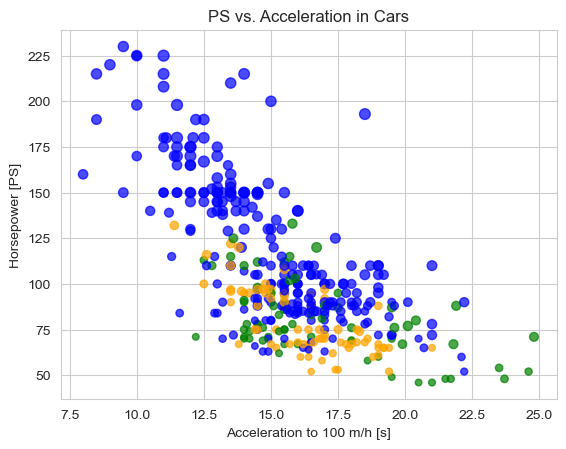

In [16]:


#x,y,z definieren
sizes = df.weight
x = df.acceleration
y = df.horsepower

#zusätzlich die Spezies über Farben trennen
colors = {"usa": "blue", "japan": "orange", "europe": "green"}
colors = [colors[o] for o in df["origin"]]

#chart erstellen
plt.scatter(x, y, s=sizes/80, c=colors, alpha=0.7)

#erscheinungsbild einfügen
plt.title("PS vs. Acceleration in Cars")
plt.xlabel("Acceleration to 100 m/h [s]")
plt.ylabel("Horsepower [PS]")
plt.show()

# Aufgabe 2:

In [22]:
ir = sns.load_dataset("iris")
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
spec = {"setosa":1, "versicolor":2, "virginica":3}

ir["sp_kat"] = ir.species.map(spec)

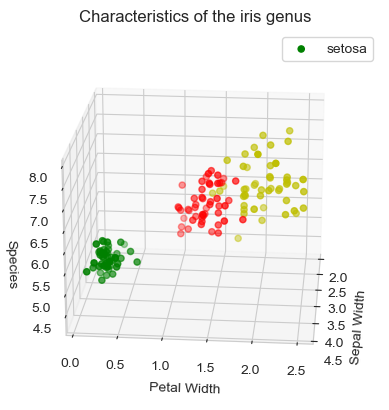

In [60]:
ax = plt.axes(projection = "3d")

species_colors = {'setosa': 'g', 'versicolor': 'r', 'virginica': 'y'}
colors = [species_colors[species] for species in ir['species']]


ax.scatter(ir["sepal_width"], ir["petal_width"], ir["sepal_length"], c=colors, s=20)
plt.title("Characteristics of the iris genus")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend(ir["species"])
ax.set_zlabel("Species")

ax.view_init(20, 5)

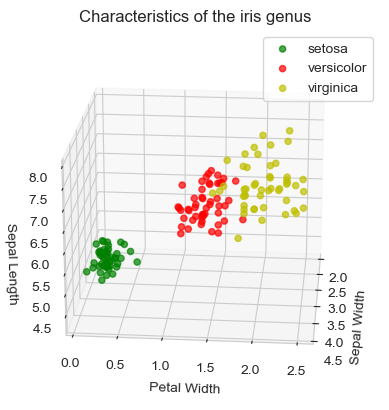

In [67]:
ax = plt.axes(projection = "3d")
species_colors = {'setosa': 'g', 'versicolor': 'r', 'virginica': 'y'}

#chart erstellen
for spec in ir.groupby("species").size().index:
    colors = [species_colors[species] for species in ir[ir["species"]==spec]["species"]]
    ax.scatter(ir[ir["species"]==spec]["sepal_width"], 
               ir[ir["species"]==spec]["petal_width"], 
               ir[ir["species"]==spec]["sepal_length"], c=colors, label=spec, alpha=0.7)

#erscheinungsbild einfügen
plt.title("Characteristics of the iris genus")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
ax.set_zlabel("Sepal Length")
plt.legend()
ax.view_init(20, 5)
plt.show()

***

In [70]:
t = sns.load_dataset('taxis')
t.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


<Axes: xlabel='tip', ylabel='total'>

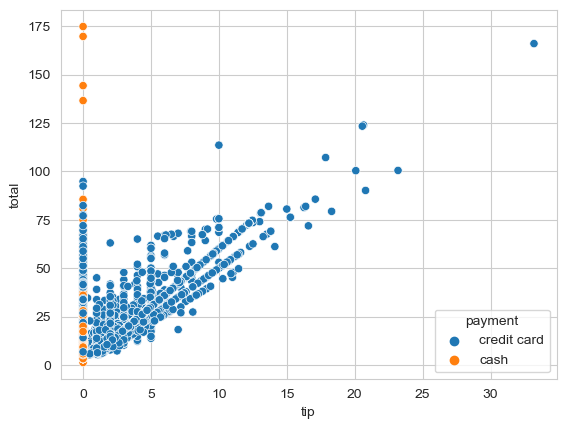

In [75]:

sns.scatterplot(x=t["tip"], y=t["total"], hue=t["payment"])